In [248]:
#Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from pprint import pprint
import numpy as np
import scipy.stats as st
from sklearn import datasets



In [249]:
#Reference to world_bank_data file
csv_path = Path("Resources/world_bank_data.csv")
world_bank_df = pd.read_csv(csv_path,encoding='latin-1')
world_bank_df.head(40)



,Country Name,Region Code,Country Code,"GDP, PPP (current international $)","Population, total",Population CGR 1960-2015,Internet users (per 100 people),Popltn Largest City % of Urban Pop,"2014 Life expectancy at birth, total (years)","Literacy rate, adult female (% of females ages 15 and above)",Exports of goods and services (% of GDP)
0,Aruba,MA,ABW,NaN,"103,889",1.19%,88.70,NaN,75.50,97.51,NaN
1,Andorra,EU,AND,NaN,"70,473",3.06%,96.90,NaN,NaN,NaN,NaN
2,Afghanistan,ME,AFG,"62,912,669,167","32,526,562",2.36%,8.30,53.40%,60.40,23.87,0.07
3,Angola,AF,AGO,"184,437,662,368","25,021,974",2.87%,12.40,50.00%,52.30,60.74,0.37
4,Albania,EU,ALB,"32,663,238,936","2,889,167",1.07%,63.30,27.30%,77.80,96.77,0.27
5,Arab World,NaN,ARB,"6,435,291,560,152","392,022,276",2.66%,39.50,29.80%,70.60,NaN,NaN
6,United Arab Emirates,ME,ARE,"643,166,288,737","9,156,963",8.71%,91.20,30.80%,77.40,95.08,NaN
7,Argentina,SA,ARG,"882,358,844,160","43,416,755",1.36%,69.40,38.10%,76.20,98.13,0.11
8,Armenia,RU,ARM,"25,329,201,238","3,017,712",0.88%,58.20,55.20%,74.70,99.73,0.30
9,American Samoa,PA,ASM,NaN,"55,538",1.87%,NaN,NaN,NaN,NaN,NaN


In [250]:
# Drop NaN / missing values from the dataset
world_bank_df.dropna(subset=['Region Code'], inplace=True)
world_bank_df.head(40)


,Country Name,Region Code,Country Code,"GDP, PPP (current international $)","Population, total",Population CGR 1960-2015,Internet users (per 100 people),Popltn Largest City % of Urban Pop,"2014 Life expectancy at birth, total (years)","Literacy rate, adult female (% of females ages 15 and above)",Exports of goods and services (% of GDP)
0,Aruba,MA,ABW,NaN,"103,889",1.19%,88.70,NaN,75.50,97.51,NaN
1,Andorra,EU,AND,NaN,"70,473",3.06%,96.90,NaN,NaN,NaN,NaN
2,Afghanistan,ME,AFG,"62,912,669,167","32,526,562",2.36%,8.30,53.40%,60.40,23.87,0.07
3,Angola,AF,AGO,"184,437,662,368","25,021,974",2.87%,12.40,50.00%,52.30,60.74,0.37
4,Albania,EU,ALB,"32,663,238,936","2,889,167",1.07%,63.30,27.30%,77.80,96.77,0.27
6,United Arab Emirates,ME,ARE,"643,166,288,737","9,156,963",8.71%,91.20,30.80%,77.40,95.08,NaN
7,Argentina,SA,ARG,"882,358,844,160","43,416,755",1.36%,69.40,38.10%,76.20,98.13,0.11
8,Armenia,RU,ARM,"25,329,201,238","3,017,712",0.88%,58.20,55.20%,74.70,99.73,0.30
9,American Samoa,PA,ASM,NaN,"55,538",1.87%,NaN,NaN,NaN,NaN,NaN
10,Antigua and Barbuda,MA,ATG,"2,108,847,544","91,818",0.95%,65.20,NaN,75.90,NaN,0.44


In [251]:
#Find world_bank_df data types
world_bank_df.dtypes

Country Name                                                     object
Region Code                                                      object
Country Code                                                     object
GDP, PPP (current international $)                               object
 Population, total                                               object
Population CGR 1960-2015                                         object
Internet users (per 100 people)                                 float64
Popltn Largest City % of Urban Pop                               object
2014 Life expectancy at birth, total (years)                    float64
Literacy rate, adult female (% of females ages 15 and above)    float64
Exports of goods and services (% of GDP)                        float64
dtype: object

In [252]:
#List of columns
world_bank_df.columns

Index(['Country Name', 'Region Code', 'Country Code',
       'GDP, PPP (current international $)', ' Population, total ',
       'Population CGR 1960-2015', 'Internet users (per 100 people)',
       'Popltn Largest City % of Urban Pop',
       '2014 Life expectancy at birth, total (years)',
       'Literacy rate, adult female (% of females ages 15 and above)',
       'Exports of goods and services (% of GDP)'],
      dtype='object')

In [253]:
#Rename and map columns 
rename_world_bank_df = world_bank_df.rename(columns={"GDP, PPP (current international $)":"GDP ($)",
                                              " Population, total ":"Population Total",
                                              "Internet users (per 100 people)":"Internet Users per 100",
                                              "Popltn Largest City % of Urban Pop":"Pop. Largest City (%)",
                                              "2014 Life expectancy at birth, total (years)":"Life Expectancy",
                                              "Literacy rate, adult female (% of females ages 15 and above)":"Female Literacy Rate (%)",
                                              "Exports of goods and services (% of GDP)":"Exportation (% of GDP)"
                                              })
rename_world_bank_df.head(40)


,Country Name,Region Code,Country Code,GDP ($),Population Total,Population CGR 1960-2015,Internet Users per 100,Pop. Largest City (%),Life Expectancy,Female Literacy Rate (%),Exportation (% of GDP)
0,Aruba,MA,ABW,NaN,"103,889",1.19%,88.70,NaN,75.50,97.51,NaN
1,Andorra,EU,AND,NaN,"70,473",3.06%,96.90,NaN,NaN,NaN,NaN
2,Afghanistan,ME,AFG,"62,912,669,167","32,526,562",2.36%,8.30,53.40%,60.40,23.87,0.07
3,Angola,AF,AGO,"184,437,662,368","25,021,974",2.87%,12.40,50.00%,52.30,60.74,0.37
4,Albania,EU,ALB,"32,663,238,936","2,889,167",1.07%,63.30,27.30%,77.80,96.77,0.27
6,United Arab Emirates,ME,ARE,"643,166,288,737","9,156,963",8.71%,91.20,30.80%,77.40,95.08,NaN
7,Argentina,SA,ARG,"882,358,844,160","43,416,755",1.36%,69.40,38.10%,76.20,98.13,0.11
8,Armenia,RU,ARM,"25,329,201,238","3,017,712",0.88%,58.20,55.20%,74.70,99.73,0.30
9,American Samoa,PA,ASM,NaN,"55,538",1.87%,NaN,NaN,NaN,NaN,NaN
10,Antigua and Barbuda,MA,ATG,"2,108,847,544","91,818",0.95%,65.20,NaN,75.90,NaN,0.44


In [254]:
#Find world_bank_df data types
rename_world_bank_df.dtypes

Country Name                 object
Region Code                  object
Country Code                 object
GDP ($)                      object
Population Total             object
Population CGR 1960-2015     object
Internet Users per 100      float64
Pop. Largest City (%)        object
Life Expectancy             float64
Female Literacy Rate (%)    float64
Exportation (% of GDP)      float64
dtype: object

In [255]:
#Reset Index
index_world_bank_df = rename_world_bank_df.reset_index(drop=True)
index_world_bank_df.head(-1)


,Country Name,Region Code,Country Code,GDP ($),Population Total,Population CGR 1960-2015,Internet Users per 100,Pop. Largest City (%),Life Expectancy,Female Literacy Rate (%),Exportation (% of GDP)
0,Aruba,MA,ABW,NaN,"103,889",1.19%,88.70,NaN,75.50,97.51,NaN
1,Andorra,EU,AND,NaN,"70,473",3.06%,96.90,NaN,NaN,NaN,NaN
2,Afghanistan,ME,AFG,"62,912,669,167","32,526,562",2.36%,8.30,53.40%,60.40,23.87,0.07
3,Angola,AF,AGO,"184,437,662,368","25,021,974",2.87%,12.40,50.00%,52.30,60.74,0.37
4,Albania,EU,ALB,"32,663,238,936","2,889,167",1.07%,63.30,27.30%,77.80,96.77,0.27
...,...,...,...,...,...,...,...,...,...,...,...
207,Samoa,PA,WSM,"1,144,453,766","193,228",1.05%,25.40,NaN,73.50,99.12,0.27
208,"Yemen, Rep.",ME,YEM,NaN,"26,832,215",3.04%,25.10,31.90%,63.80,54.85,NaN
209,South Africa,AF,ZAF,"723,515,991,686","54,956,920",2.11%,51.90,26.40%,57.20,93.43,0.31
210,"Congo, Dem. Rep.",AF,COD,"60,482,256,092","77,266,814",2.99%,3.80,35.30%,58.70,65.90,0.29


In [256]:
#Value count for region codes.
index_world_bank_df["Region Code"].value_counts()

Region Code
AF              48
EU              47
MA              30
ME              26
PA              16
SA              12
SE              11
SS               7
EA               7
RU               4
NorthAmerica     3
AU               2
Name: count, dtype: int64

In [257]:
#Remove commas, space, %
index_world_bank_df['GDP ($)'] = (
    index_world_bank_df['GDP ($)']
    .str.replace(',', '', regex=False)
    .str.strip())

index_world_bank_df['Population Total'] = (
    index_world_bank_df['Population Total']
    .str.replace(',', '', regex=False)
    .str.strip())

index_world_bank_df['Population CGR 1960-2015'] = (
    index_world_bank_df['Population CGR 1960-2015']
    .str.replace('%', '', regex=False)
    .str.strip())


index_world_bank_df['Pop. Largest City (%)'] = (
    index_world_bank_df['Pop. Largest City (%)']
    .str.replace('%','', regex=False)
    .str.strip())

index_world_bank_df


,Country Name,Region Code,Country Code,GDP ($),Population Total,Population CGR 1960-2015,Internet Users per 100,Pop. Largest City (%),Life Expectancy,Female Literacy Rate (%),Exportation (% of GDP)
0,Aruba,MA,ABW,NaN,103889,1.19,88.70,NaN,75.50,97.51,NaN
1,Andorra,EU,AND,NaN,70473,3.06,96.90,NaN,NaN,NaN,NaN
2,Afghanistan,ME,AFG,62912669167,32526562,2.36,8.30,53.40,60.40,23.87,0.07
3,Angola,AF,AGO,184437662368,25021974,2.87,12.40,50.00,52.30,60.74,0.37
4,Albania,EU,ALB,32663238936,2889167,1.07,63.30,27.30,77.80,96.77,0.27
...,...,...,...,...,...,...,...,...,...,...,...
208,"Yemen, Rep.",ME,YEM,NaN,26832215,3.04,25.10,31.90,63.80,54.85,NaN
209,South Africa,AF,ZAF,723515991686,54956920,2.11,51.90,26.40,57.20,93.43,0.31
210,"Congo, Dem. Rep.",AF,COD,60482256092,77266814,2.99,3.80,35.30,58.70,65.90,0.29
211,Zambia,AF,ZMB,62458409612,16211767,3.08,21.00,32.90,60.00,80.57,NaN


In [258]:
# Use df.astype() method to convert the datatype of the columns
index_world_bank_df = index_world_bank_df.astype({"GDP ($)": float}, errors='raise')
index_world_bank_df = index_world_bank_df.astype({"Population Total": float}, errors='raise')
index_world_bank_df = index_world_bank_df.astype({"Population CGR 1960-2015": float}, errors='raise')
index_world_bank_df = index_world_bank_df.astype({"Pop. Largest City (%)": float}, errors='raise')

#Remove scientific format
pd.options.display.float_format = '{:,.2f}'.format

# Verify that the column datatype has been changed
index_world_bank_df


,Country Name,Region Code,Country Code,GDP ($),Population Total,Population CGR 1960-2015,Internet Users per 100,Pop. Largest City (%),Life Expectancy,Female Literacy Rate (%),Exportation (% of GDP)
0,Aruba,MA,ABW,NaN,"103,889.00",1.19,88.70,NaN,75.50,97.51,NaN
1,Andorra,EU,AND,NaN,"70,473.00",3.06,96.90,NaN,NaN,NaN,NaN
2,Afghanistan,ME,AFG,"62,912,669,167.00","32,526,562.00",2.36,8.30,53.40,60.40,23.87,0.07
3,Angola,AF,AGO,"184,437,662,368.00","25,021,974.00",2.87,12.40,50.00,52.30,60.74,0.37
4,Albania,EU,ALB,"32,663,238,936.00","2,889,167.00",1.07,63.30,27.30,77.80,96.77,0.27
...,...,...,...,...,...,...,...,...,...,...,...
208,"Yemen, Rep.",ME,YEM,NaN,"26,832,215.00",3.04,25.10,31.90,63.80,54.85,NaN
209,South Africa,AF,ZAF,"723,515,991,686.00","54,956,920.00",2.11,51.90,26.40,57.20,93.43,0.31
210,"Congo, Dem. Rep.",AF,COD,"60,482,256,092.00","77,266,814.00",2.99,3.80,35.30,58.70,65.90,0.29
211,Zambia,AF,ZMB,"62,458,409,612.00","16,211,767.00",3.08,21.00,32.90,60.00,80.57,NaN


In [259]:
#Identify incomplete rows

index_world_bank_df.count()

Country Name                213
Region Code                 213
Country Code                213
GDP ($)                     168
Population Total            212
Population CGR 1960-2015    209
Internet Users per 100      198
Pop. Largest City (%)       150
Life Expectancy             195
Female Literacy Rate (%)    154
Exportation (% of GDP)      142
dtype: int64

In [260]:
#Summary Stats

index_world_bank_df.describe()

,GDP ($),Population Total,Population CGR 1960-2015,Internet Users per 100,Pop. Largest City (%),Life Expectancy,Female Literacy Rate (%),Exportation (% of GDP)
count,168.00,212.00,209.00,198.00,150.00,195.00,154.00,142.00
mean,"651,464,940,252.70","34,511,671.26",1.85,48.04,32.58,71.31,80.77,0.41
std,"2,211,503,790,962.59","134,893,917.93",1.19,28.91,17.62,8.47,22.41,0.32
min,"208,954,488.00","9,916.00",-0.17,1.10,3.10,48.90,11.02,0.07
25%,"25,172,871,956.50","830,913.50",0.94,20.77,20.92,65.75,68.42,0.22
50%,"76,646,093,969.50","6,365,811.00",1.96,49.55,30.10,73.50,92.72,0.33
75%,"403,355,404,113.00","23,453,426.50",2.56,73.05,40.05,77.35,97.51,0.47
max,"19,524,348,171,415.00","1,371,220,000.00",8.71,98.20,100.00,84.00,100.00,2.14


In [261]:
#Stats table for GDP by Region Code
means = index_world_bank_df.groupby("Region Code")["GDP ($)"].mean()
medians = index_world_bank_df.groupby("Region Code")["GDP ($)"].median()
variances = index_world_bank_df.groupby("Region Code")["GDP ($)"].var()
stds = index_world_bank_df.groupby("Region Code")["GDP ($)"].std()
sems = index_world_bank_df.groupby("Region Code")["GDP ($)"].sem()
stats_table_gdp  = pd.DataFrame({"Mean GDP($)": means,
                             "Median GDP($)": medians,
                             "GDP($) Variance": variances,
                             "GDP($) Std.Dev.": stds,
                             "GDP($) Std.Err.": sems})
stats_table_gdp


,Mean GDP($),Median GDP($),GDP($) Variance,GDP($) Std.Dev.,GDP($) Std.Err.
Region Code,,,,,
AF,"93,127,962,064.26","30,480,978,104.00","40,996,829,225,940,322,091,008.00","202,476,737,493.32","32,422,226,163.28"
AU,"626,169,928,411.00","626,169,928,411.00","416,255,819,617,564,427,812,864.00","645,178,905,124.43","456,210,378,892.00"
EA,"4,421,207,403,156.17","1,081,576,019,107.50","57,920,929,969,850,871,453,843,456.00","7,610,580,133,593.68","3,107,006,328,977.86"
EU,"532,701,497,414.36","251,841,869,479.00","761,189,011,538,123,784,454,144.00","872,461,467,079.28","139,705,643,989.48"
MA,"143,511,735,523.35","21,789,322,018.50","234,918,909,665,794,427,191,296.00","484,684,340,231.65","108,378,713,238.76"
ME,"375,566,320,177.30","187,667,827,321.00","213,049,145,729,201,666,523,136.00","461,572,470,722.86","96,244,513,277.65"
NorthAmerica,"9,767,796,223,481.50","9,767,796,223,481.50","133,798,617,968,400,556,797,984,768.00","11,567,135,253,311.45","8,179,199,776,518.50"
PA,"2,225,181,311.60","1,144,453,766.00","11,274,429,918,810,757,120.00","3,357,741,788.59","1,501,627,778.03"
RU,"952,994,953,561.00","103,412,112,810.50","3,071,194,487,417,729,311,571,968.00","1,752,482,378,632.59","876,241,189,316.29"


In [262]:
#Stats table for Internet Users per 100 by Region Code
means = index_world_bank_df.groupby("Region Code")["Internet Users per 100"].mean()
medians = index_world_bank_df.groupby("Region Code")["Internet Users per 100"].median()
variances = index_world_bank_df.groupby("Region Code")["Internet Users per 100"].var()
stds = index_world_bank_df.groupby("Region Code")["Internet Users per 100"].std()
sems = index_world_bank_df.groupby("Region Code")["Internet Users per 100"].sem()
stats_table_internet  = pd.DataFrame({"Mean Internet Users per 100": means,
                             "Median Internet Users per 100": medians,
                             "Internet Users per 100 Variance": variances,
                             "Internet Users per 100 Std.Dev.": stds,
                             "Internet Users per 100 Std.Err.": sems})
stats_table_internet

,Mean Internet Users per 100,Median Internet Users per 100,Internet Users per 100 Variance,Internet Users per 100 Std.Dev.,Internet Users per 100 Std.Err.
Region Code,,,,,
AF,16.46,13.80,171.90,13.11,1.89
AU,86.40,86.40,6.48,2.55,1.80
EA,69.57,81.25,793.52,28.17,11.50
EU,77.91,78.95,194.46,13.94,2.15
MA,53.29,53.80,450.77,21.23,4.25
ME,50.93,50.95,690.98,26.29,5.16
NorthAmerica,76.90,74.60,113.17,10.64,6.14
PA,35.85,28.45,580.01,24.08,6.95
RU,63.45,65.80,214.41,14.64,7.32


In [263]:
#Stats table for Life Expectancy by Region Code
means = index_world_bank_df.groupby("Region Code")["Life Expectancy"].mean()
medians = index_world_bank_df.groupby("Region Code")["Life Expectancy"].median()
variances = index_world_bank_df.groupby("Region Code")["Life Expectancy"].var()
stds = index_world_bank_df.groupby("Region Code")["Life Expectancy"].std()
sems = index_world_bank_df.groupby("Region Code")["Life Expectancy"].sem()
stats_table_life_exp  = pd.DataFrame({"Mean Life Expectancy": means,
                             "Median Life Expectancy": medians,
                             "Life Expectancy Variance": variances,
                             "Life Expectancy Std.Dev.": stds,
                             "Life Expectancy Std.Err.": sems})
stats_table_life_exp

,Mean Life Expectancy,Median Life Expectancy,Life Expectancy Variance,Life Expectancy Std.Dev.,Life Expectancy Std.Err.
Region Code,,,,,
AF,59.63,59.85,30.31,5.51,0.79
AU,81.85,81.85,0.40,0.64,0.45
EA,77.97,80.60,38.54,6.21,2.35
EU,78.66,80.50,12.46,3.53,0.54
MA,74.90,75.35,14.95,3.87,0.79
ME,72.80,74.05,23.78,4.88,0.96
NorthAmerica,80.45,80.45,4.80,2.19,1.55
PA,71.43,71.00,28.25,5.31,1.68
RU,72.65,72.75,5.63,2.37,1.19


In [264]:
#Stats table for Population Total by Region Code
means = index_world_bank_df.groupby("Region Code")["Population Total"].mean()
medians = index_world_bank_df.groupby("Region Code")["Population Total"].median()
variances = index_world_bank_df.groupby("Region Code")["Population Total"].var()
stds = index_world_bank_df.groupby("Region Code")["Population Total"].std()
sems = index_world_bank_df.groupby("Region Code")["Population Total"].sem()
stats_table_population  = pd.DataFrame({"Mean Population Total": means,
                             "Median Population Total": medians,
                             "Population Total Variance": variances,
                             "Population Total Std.Dev.": stds,
                             "Population Total Std.Err.": sems})

stats_table_population

,Mean Population Total,Median Population Total,Population Total Variance,Population Total Std.Dev.,Population Total Std.Err.
Region Code,,,,,
AF,"21,178,547.15","12,339,812.00","1,004,144,814,624,725.75","31,688,244.11","4,622,205.46"
AU,"14,188,434.50","14,188,434.50","184,041,110,374,980.50","13,566,175.23","9,592,734.50"
EA,"226,400,467.71","25,155,317.00","256,803,314,961,512,928.00","506,757,649.14","191,536,387.80"
EU,"12,776,690.60","5,195,921.00","410,729,309,953,220.88","20,266,457.76","2,956,166.69"
MA,"7,159,446.40","321,751.00","531,660,612,327,444.44","23,057,766.85","4,209,753.01"
ME,"23,176,709.15","10,132,381.50","637,818,534,156,080.50","25,255,069.47","4,952,926.62"
NorthAmerica,"119,108,902.67","35,851,774.00","31,017,309,307,274,024.00","176,117,316.89","101,681,380.31"
PA,"668,781.19","141,154.00","3,490,541,116,082.43","1,868,298.99","467,074.75"
RU,"40,111,218.25","6,665,174.50","4,814,680,691,600,519.00","69,387,900.18","34,693,950.09"


In [265]:
#Outliers - needs work if it is to be used - DONT USE
quartiles = region_code_gdp.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of GDP ($) is: {lowerq}")
print(f"The upper quartile of GDP ($) is: {upperq}")
print(f"The interquartile range of GDP ($) is: {iqr}")
print(f"The the median of GDP ($) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of GDP ($) is: 317552674013.81573
The upper quartile of GDP ($) is: 1064718937554.2856
The interquartile range of GDP ($) is: 747166263540.47
The the median of GDP ($) is: 582920524317.6819 
Values below -803196721296.8894 could be outliers.
Values above 2185468332864.9907 could be outliers.


In [266]:
#Mean of GDP per Region Code

region_code_gdp = index_world_bank_df.groupby('Region Code')['GDP ($)'].mean()

region_code_gdp.head()


Region Code
AF      93,127,962,064.26
AU     626,169,928,411.00
EA   4,421,207,403,156.17
EU     532,701,497,414.36
MA     143,511,735,523.35
Name: GDP ($), dtype: float64

In [267]:
#Mean of Population Total per Region Code

region_code_population = index_world_bank_df.groupby('Region Code')['Population Total'].mean()

region_code_population.head()

Region Code
AF    21,178,547.15
AU    14,188,434.50
EA   226,400,467.71
EU    12,776,690.60
MA     7,159,446.40
Name: Population Total, dtype: float64

In [268]:
#Mean of Life Expectancy per Region Code

region_code_life = index_world_bank_df.groupby('Region Code')['Life Expectancy'].mean()

region_code_life.head()

Region Code
AF   59.63
AU   81.85
EA   77.97
EU   78.66
MA   74.90
Name: Life Expectancy, dtype: float64

In [269]:
#Mean of Internet users per 100 per Region Code

region_code_internet = index_world_bank_df.groupby('Region Code')['Internet Users per 100'].mean()

region_code_internet.head(12)

Region Code
AF             16.46
AU             86.40
EA             69.57
EU             77.91
MA             53.29
ME             50.93
NorthAmerica   76.90
PA             35.85
RU             63.45
SA             52.96
SE             41.05
SS             28.61
Name: Internet Users per 100, dtype: float64

In [270]:
#Export per Region Code - Did not include in analysis beacause of insufficent data

region_code_exportation = index_world_bank_df.groupby('Region Code')['Exportation (% of GDP)'].mean()

region_code_exportation.head(12)

Region Code
AF             0.29
AU             0.20
EA             0.68
EU             0.58
MA             0.33
ME             0.30
NorthAmerica   0.22
PA             0.42
RU             0.36
SA             0.26
SE             0.70
SS             0.35
Name: Exportation (% of GDP), dtype: float64

In [271]:
#Mean of Female Literacy - Did not include in analysis beacause of insufficent data
region_code_female = index_world_bank_df.groupby('Region Code')['Female Literacy Rate (%)'].mean()

region_code_female.head(12)

Region Code
AF             59.87
AU               NaN
EA             96.91
EU             98.11
MA             88.84
ME             84.67
NorthAmerica     NaN
PA             91.24
RU             99.73
SA             94.49
SE             86.87
SS             66.35
Name: Female Literacy Rate (%), dtype: float64

In [272]:
#Summary DataFrame for Regional GDP - Bar chart

summary_region_code = pd.DataFrame({"GDP ($)":region_code_gdp,
                                    "Population Total":region_code_population,
                                    "Life Expectancy":region_code_life,
                                    "Internet Users per 100":region_code_internet
                                    })

summary_region_code.head(13)

,GDP ($),Population Total,Life Expectancy,Internet Users per 100
Region Code,,,,
AF,"93,127,962,064.26","21,178,547.15",59.63,16.46
AU,"626,169,928,411.00","14,188,434.50",81.85,86.40
EA,"4,421,207,403,156.17","226,400,467.71",77.97,69.57
EU,"532,701,497,414.36","12,776,690.60",78.66,77.91
MA,"143,511,735,523.35","7,159,446.40",74.90,53.29
ME,"375,566,320,177.30","23,176,709.15",72.80,50.93
NorthAmerica,"9,767,796,223,481.50","119,108,902.67",80.45,76.90
PA,"2,225,181,311.60","668,781.19",71.43,35.85
RU,"952,994,953,561.00","40,111,218.25",72.65,63.45


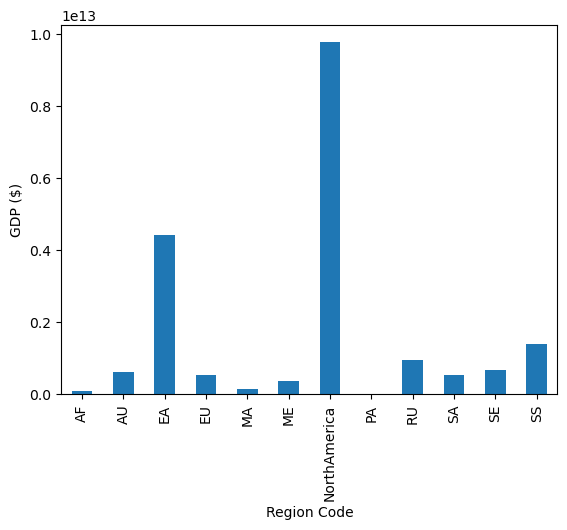

In [273]:
# Bar chart for regions and GDP$

region_code_gdp.plot(kind="bar")
plt.ylabel("GDP ($)")
plt.show()



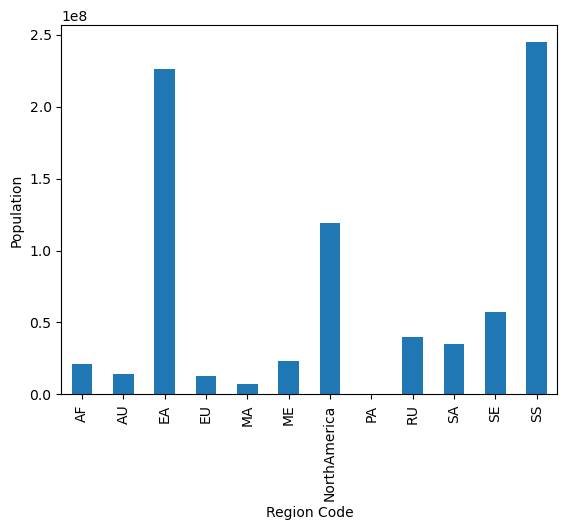

In [274]:
# Bar chart for regions and Population

region_code_population.plot(kind="bar")
plt.ylabel("Population")
plt.show()


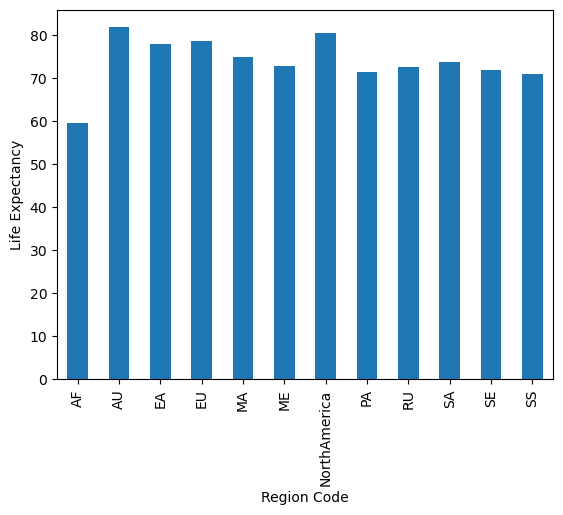

In [275]:
# Bar chart for regions and Life Expectancy

region_code_life.plot(kind="bar")
plt.ylabel("Life Expectancy")
plt.show()


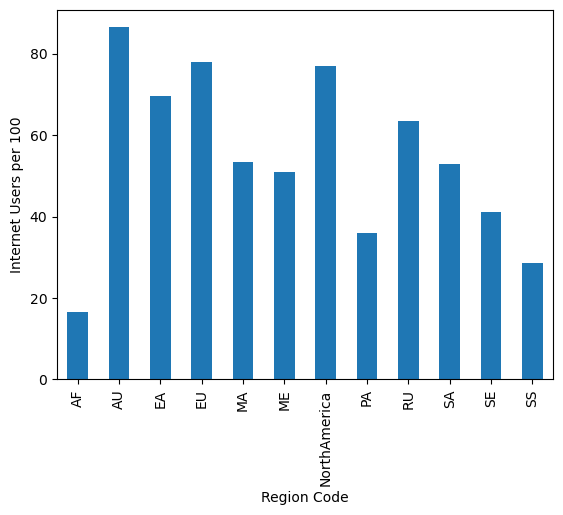

In [276]:
# Bar chart for regions and Internet Users per 100

region_code_internet.plot(kind="bar")
plt.ylabel("Internet Users per 100")
plt.show()


In [277]:
#Dataframe to summarize Regional Averages
region_dataframe = pd.DataFrame({
    "Regional GDP ($)":region_code_gdp,
    "Regional Population":region_code_population,
    "Regional Life Expectancy":region_code_life,
    "Regional Internet Users per 100":region_code_internet,
})
region_dataframe.head(13)

,Regional GDP ($),Regional Population,Regional Life Expectancy,Regional Internet Users per 100
Region Code,,,,
AF,"93,127,962,064.26","21,178,547.15",59.63,16.46
AU,"626,169,928,411.00","14,188,434.50",81.85,86.40
EA,"4,421,207,403,156.17","226,400,467.71",77.97,69.57
EU,"532,701,497,414.36","12,776,690.60",78.66,77.91
MA,"143,511,735,523.35","7,159,446.40",74.90,53.29
ME,"375,566,320,177.30","23,176,709.15",72.80,50.93
NorthAmerica,"9,767,796,223,481.50","119,108,902.67",80.45,76.90
PA,"2,225,181,311.60","668,781.19",71.43,35.85
RU,"952,994,953,561.00","40,111,218.25",72.65,63.45


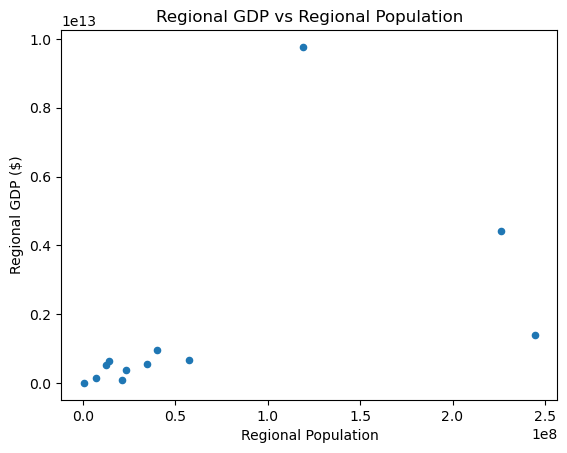

In [278]:
#Scatter plot for Regional GDP vs Regional Population
region_dataframe.plot.scatter(x='Regional Population', y='Regional GDP ($)', title='Regional GDP vs Regional Population')

plt.show()

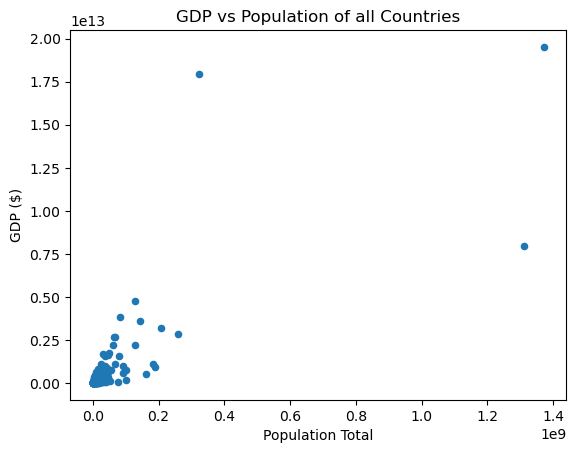

In [279]:
#Scatter plot for GDP vs Poulation of all countries
index_world_bank_df.plot.scatter(x='Population Total', y='GDP ($)', title='GDP vs Population of all Countries')

plt.show()

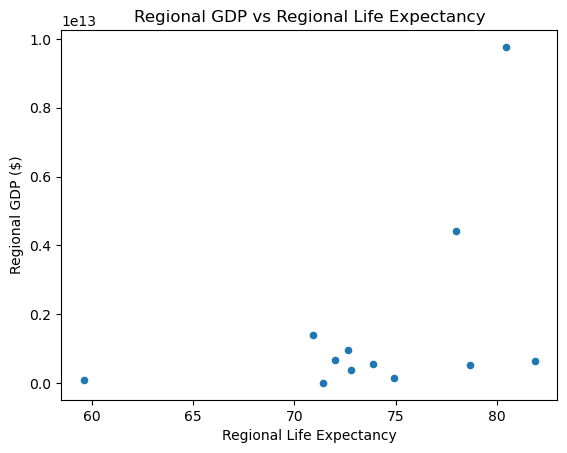

In [280]:
#Scatter plot for Regional GDP vs Regional Life Expectancy
region_dataframe.plot.scatter(x='Regional Life Expectancy', y='Regional GDP ($)', title='Regional GDP vs Regional Life Expectancy')

plt.show()


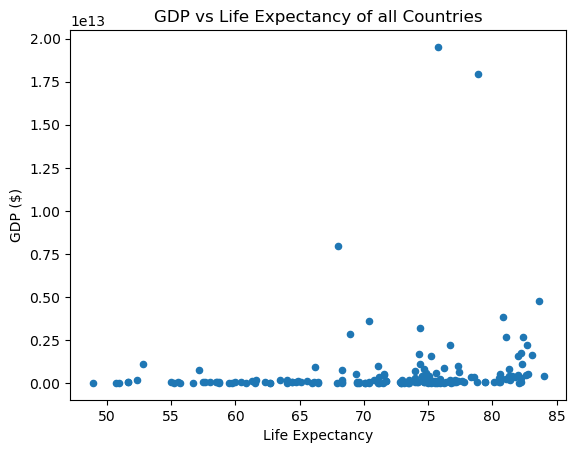

In [281]:
#Scatter plot for GDP vs Life Expectancy of all countries
index_world_bank_df.plot.scatter(x='Life Expectancy', y='GDP ($)', title='GDP vs Life Expectancy of all Countries')

plt.show()

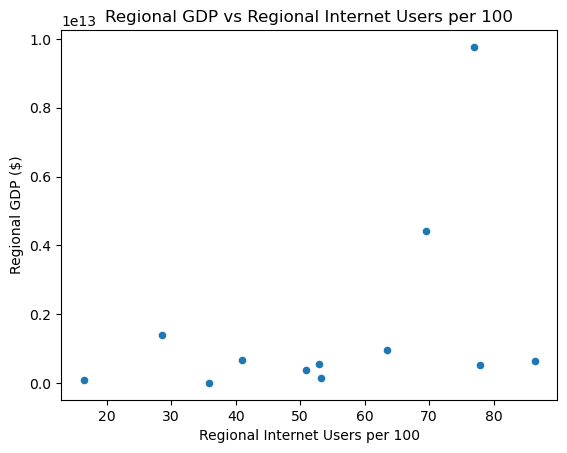

In [282]:
#Scatter plot for Regional GDP vs Regional Internet Users per 100
region_dataframe.plot.scatter(x='Regional Internet Users per 100', y='Regional GDP ($)', title='Regional GDP vs Regional Internet Users per 100')

plt.show()

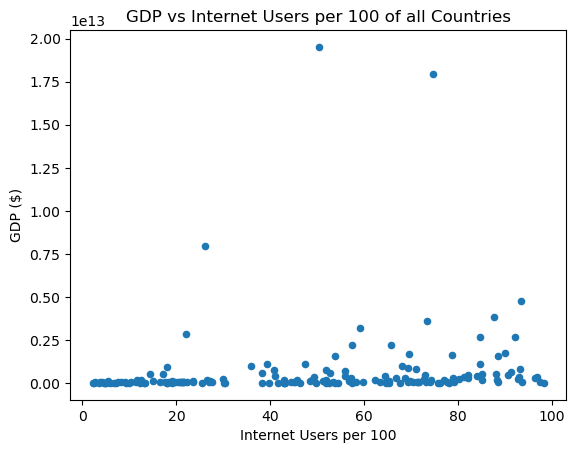

In [283]:
#Scatter plot for GDP vs Internet Users per 100 for all countries
index_world_bank_df.plot.scatter(x='Internet Users per 100', y='GDP ($)', title='GDP vs Internet Users per 100 of all Countries')

plt.show()

The correlation between regional population and the GDP is 0.5


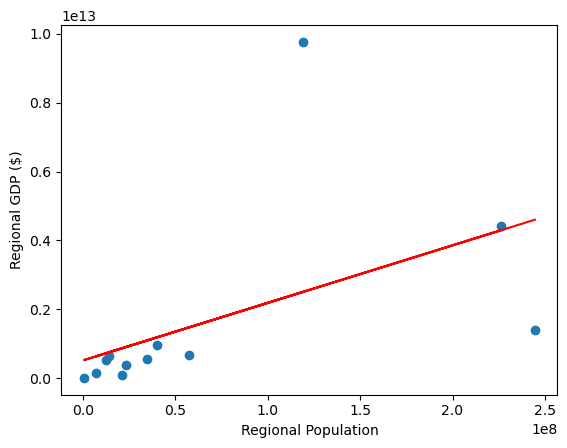

In [284]:
#Regression Analysis - Regional Population

# Calculate the correlation coefficient and a linear regression model
# for Regional Population and Regional GDP ($)
corr_population=round(st.pearsonr(region_dataframe['Regional Population'],region_dataframe['Regional GDP ($)'])[0],2)
print(f"The correlation between regional population and the GDP is {corr_population}")
model = st.linregress(region_dataframe['Regional Population'],region_dataframe['Regional GDP ($)'])
linear_plot = region_dataframe['Regional Population']*model[0]+model[1]
plt.scatter(region_dataframe['Regional Population'],region_dataframe['Regional GDP ($)'])
plt.plot(region_dataframe['Regional Population'], linear_plot, color = "red")
plt.xlabel('Regional Population')
plt.ylabel("Regional GDP ($)")
plt.show()


The correlation between regional life expectancy and the GDP is 0.45


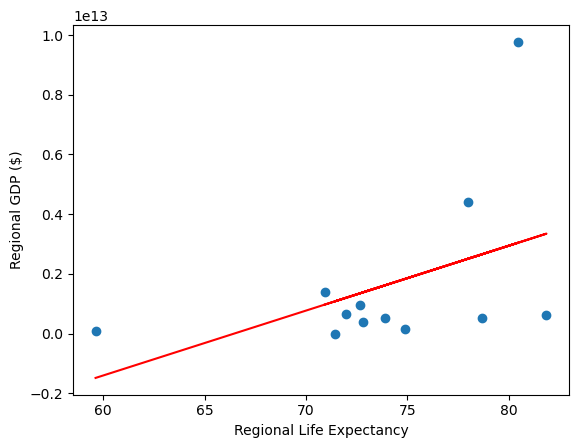

In [285]:
#Regression Analysis - Regional Life Expectancy

# Calculate the correlation coefficient and a linear regression model
# for Regional Life Expectancy and Regional GDP ($)
corr_life=round(st.pearsonr(region_dataframe['Regional Life Expectancy'],region_dataframe['Regional GDP ($)'])[0],2)
print(f"The correlation between regional life expectancy and the GDP is {corr_life}")
model = st.linregress(region_dataframe['Regional Life Expectancy'],region_dataframe['Regional GDP ($)'])
linear_plot = region_dataframe['Regional Life Expectancy']*model[0]+model[1]
plt.scatter(region_dataframe['Regional Life Expectancy'],region_dataframe['Regional GDP ($)'])
plt.plot(region_dataframe['Regional Life Expectancy'], linear_plot, color = "red")
plt.xlabel('Regional Life Expectancy')
plt.ylabel("Regional GDP ($)")
plt.show()

The correlation between Regional Internet Users per 100 and the GDP is 0.42


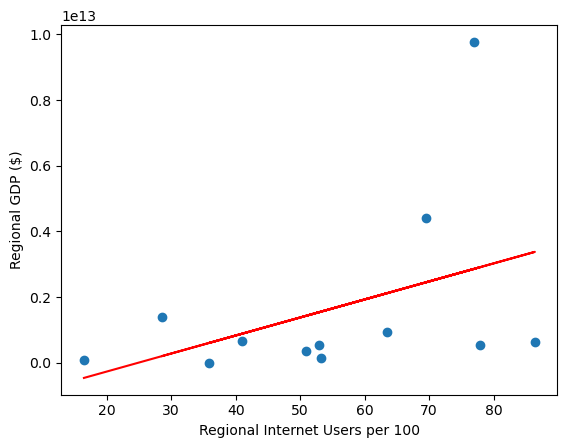

In [286]:
#Regression Analysis - Regional Internet Users per 100

# Calculate the correlation coefficient and a linear regression model
# for Regional Internet Users per 100 and Regional GDP ($)
corr_internet=round(st.pearsonr(region_dataframe['Regional Internet Users per 100'],region_dataframe['Regional GDP ($)'])[0],2)
print(f"The correlation between Regional Internet Users per 100 and the GDP is {corr_internet}")
model = st.linregress(region_dataframe['Regional Internet Users per 100'],region_dataframe['Regional GDP ($)'])
linear_plot = region_dataframe['Regional Internet Users per 100']*model[0]+model[1]
plt.scatter(region_dataframe['Regional Internet Users per 100'],region_dataframe['Regional GDP ($)'])
plt.plot(region_dataframe['Regional Internet Users per 100'], linear_plot, color = "red")
plt.xlabel('Regional Internet Users per 100')
plt.ylabel("Regional GDP ($)")
plt.show()

The correlation between Regional Internet Users per 100 and the regional population is -0.04


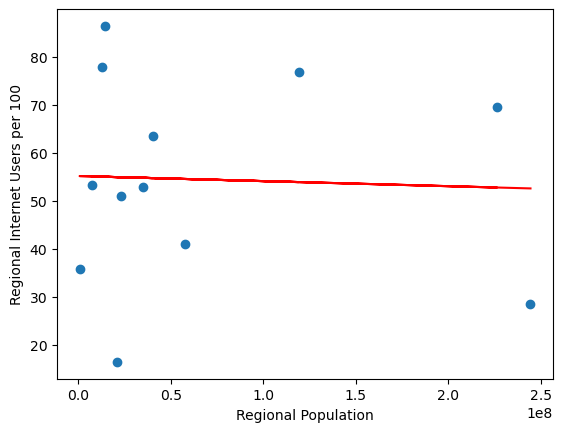

In [287]:
#Regression Analysis - Regional Internet Users per 100 vs Regional Population

# Calculate the correlation coefficient and a linear regression model
# for Regional Internet Users per 100 and Regional Population ($)
corr_int_pop=round(st.pearsonr(region_dataframe['Regional Population'],region_dataframe['Regional Internet Users per 100'])[0],2)
print(f"The correlation between Regional Internet Users per 100 and the regional population is {corr_int_pop}")
model = st.linregress(region_dataframe['Regional Population'],region_dataframe['Regional Internet Users per 100'])
linear_plot = region_dataframe['Regional Population']*model[0]+model[1]
plt.scatter(region_dataframe['Regional Population'],region_dataframe['Regional Internet Users per 100'])
plt.plot(region_dataframe['Regional Population'], linear_plot, color = "red")
plt.xlabel('Regional Population')
plt.ylabel("Regional Internet Users per 100")
plt.show()